In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
from sklearn import metrics
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import matplotlib.image as pltimg


In [184]:
df = pd.read_excel('marketing_campaign.xlsx')

In [185]:
df.head()
len(df)

2240

In [186]:
#Dropping Columns which are irrelevant to our study
df=df.drop(['Dt_Customer','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Z_CostContact','Z_Revenue'], axis=1)
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,46,27,15,5,5,3,6,5,0,0


In [187]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Complain                 int64
Response                 int64
dtype: object

In [188]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

In [189]:
df = df.replace(to_replace=["Alone","YOLO","Widow","Divorced"],value="Single") 
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,46,27,15,5,5,3,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,...,42,118,247,2,9,3,4,5,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,56,406,0,...,0,0,8,7,8,2,5,7,0,0
2237,7270,1981,Graduation,Single,56981.0,0,0,91,908,48,...,32,12,24,1,2,3,13,6,0,0
2238,8235,1956,Master,Together,69245.0,0,1,8,428,30,...,80,30,61,2,6,5,10,3,0,0


In [190]:
df = df.replace(to_replace=["Together"],value="Married") 
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Married,71613.0,0,0,26,426,49,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Married,26646.0,1,0,26,11,4,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,46,27,15,5,5,3,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,...,42,118,247,2,9,3,4,5,0,0
2236,4001,1946,PhD,Married,64014.0,2,1,56,406,0,...,0,0,8,7,8,2,5,7,0,0
2237,7270,1981,Graduation,Single,56981.0,0,0,91,908,48,...,32,12,24,1,2,3,13,6,0,0
2238,8235,1956,Master,Married,69245.0,0,1,8,428,30,...,80,30,61,2,6,5,10,3,0,0


In [191]:
#Since 1% of data has null values, dropping them won't affect out Data Quality
df=df.dropna()

<AxesSubplot:>

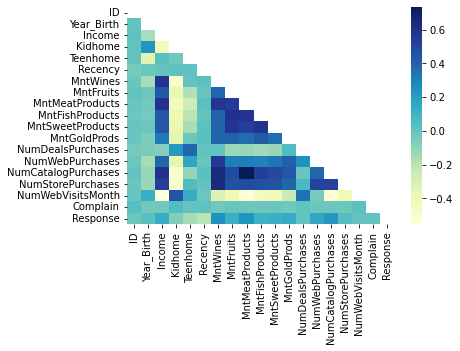

In [192]:
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), cmap="YlGnBu", mask=mask)

<AxesSubplot:xlabel='Response', ylabel='count'>

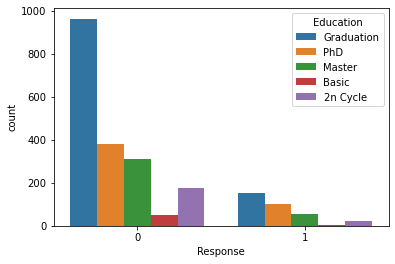

In [193]:
sns.countplot(x='Response', hue='Education', data=df)

<AxesSubplot:xlabel='Response', ylabel='count'>

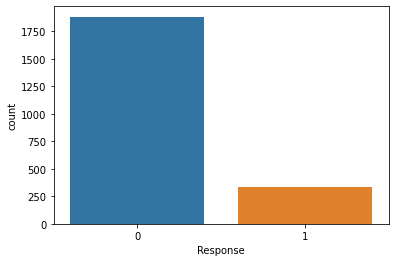

In [194]:
sns.countplot(x='Response', data=df)

<AxesSubplot:xlabel='Response', ylabel='count'>

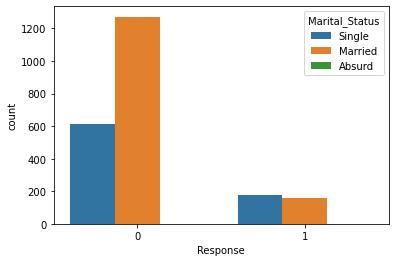

In [195]:
sns.countplot(x='Response', hue='Marital_Status', data=df)

/Users/omkarsadekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

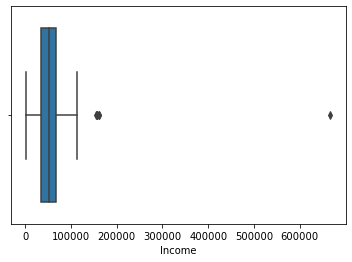

In [196]:
sns.boxplot(df['Income'])

In [197]:
#One hot encoding
df = pd.get_dummies(df, columns=['Education','Marital_Status'], drop_first=True)

In [199]:
X=df.drop('Response',axis=1)
y=df['Response']

#constant term to independent variables
X = smf.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

logit_model = smf.Logit(y_train, X_train)
result = logit_model.fit()

print(result.summary())

# predicted class labels on the test data
y_pred = result.predict(X_test)

# Converting predicted class labels to binary labels
y_pred = [1 if p > 0.5 else 0 for p in y_pred]

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
print('\n')
#classification report
class_report = classification_report(y_test, y_pred)

print(class_report)

Optimization terminated successfully.
         Current function value: 0.308487
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1329
Model:                          Logit   Df Residuals:                     1305
Method:                           MLE   Df Model:                           23
Date:                Sun, 29 Jan 2023   Pseudo R-squ.:                  0.2717
Time:                        22:11:03   Log-Likelihood:                -409.98
converged:                       True   LL-Null:                       -562.91
Covariance Type:            nonrobust   LLR p-value:                 2.998e-51
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.7636        nan        nan        nan         nan     

In [200]:
from sklearn import svm

svm_model = svm.SVC(kernel='linear')

#Training the model
svm_model.fit(X_train, y_train)

#Predicting the response for test dataset
y_pred = svm_model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print(classification_report(y_test, y_pred))

[[729  25]
 [109  24]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       754
           1       0.49      0.18      0.26       133

    accuracy                           0.85       887
   macro avg       0.68      0.57      0.59       887
weighted avg       0.81      0.85      0.82       887

